데이터에 관한 질문

1. 부산 기온 데이터 수집
2. 부산에서 가장 더웠던 날은?
3. 매년 크리스마스의 최고 기온과 최저 기온 추이 plot
4. 월별 기온 데이터 boxplot

In [1]:
!pip install matplotlib

In [15]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df= pd.read_csv('./DS/data/ta_20220921111357.csv', header=7, encoding='utf-8')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [21]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [22]:
df.rename(columns={'평균기온(℃)':'평균기온', '최고기온(℃)':'최고기온', '최저기온(℃)':'최저기온'},inplace=True)
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
2,1904-04-11,159,10.6,NaN,14.9
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9


In [27]:
#결측치 데이터 찾기

df.isnull().sum()

날짜       0
지점       0
평균기온     0
최저기온    10
최고기온     4
dtype: int64

In [53]:
df[pd.isnull(df)]

,날짜,지점,평균기온,최저기온,최고기온
0,NaT,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...
43259,NaT,NaN,NaN,NaN,NaN
43260,NaT,NaN,NaN,NaN,NaN
43261,NaT,NaN,NaN,NaN,NaN
43262,NaT,NaN,NaN,NaN,NaN


In [32]:
#최고기온 찾기
df.sort_values(by=['최고기온'],ascending=False).head(1)

,날짜,지점,평균기온,최저기온,최고기온
41035,2016-08-14,159,31.7,28.3,37.3


In [34]:
#날짜형식으로 변환
df['날짜'] = df['날짜'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43264 entries, 0 to 43263
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      43264 non-null  datetime64[ns]
 1   지점      43264 non-null  int64         
 2   평균기온    43264 non-null  float64       
 3   최저기온    43254 non-null  float64       
 4   최고기온    43260 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.7 MB


In [36]:
#크리스마스날짜 데이터만 뽑아내기 
christ_df = df[  (df['날짜'].dt.month==12) & (df['날짜'].dt.day==25)]
christ_df.head()


,날짜,지점,평균기온,최저기온,최고기온
260,1904-12-25,159,2.5,-1.5,7.7
625,1905-12-25,159,11.6,10.5,14.8
990,1906-12-25,159,0.3,-4.8,3.8
1355,1907-12-25,159,9.1,5.3,13.9
1721,1908-12-25,159,3.8,-0.6,9.1


In [38]:
#필요한 정보만 뽑아내기

christ_df= christ_df[['날짜','최저기온','최고기온']]
christ_df.head()

,날짜,최저기온,최고기온
260,1904-12-25,-1.5,7.7
625,1905-12-25,10.5,14.8
990,1906-12-25,-4.8,3.8
1355,1907-12-25,5.3,13.9
1721,1908-12-25,-0.6,9.1


Name: matplotlib
Version: 3.6.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\python\lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: 


Text(0, 1, 'average temperature (℃)')

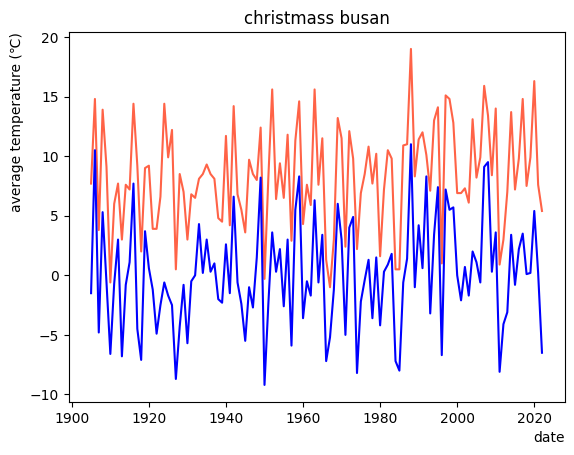

In [43]:
!pip show matplotlib
!pip install -U matplotlib
#plt.plot(x축, y축, 색상, 그래프이름)


plt.plot(christ_df['날짜'],christ_df['최고기온'], color='tomato')
plt.title('christmass busan')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')

plt.plot(christ_df['날짜'],christ_df['최저기온'], color='b')
plt.title('christmass busan')
plt.xlabel('date', loc='right')
plt.ylabel('average temperature (℃)', loc='top')

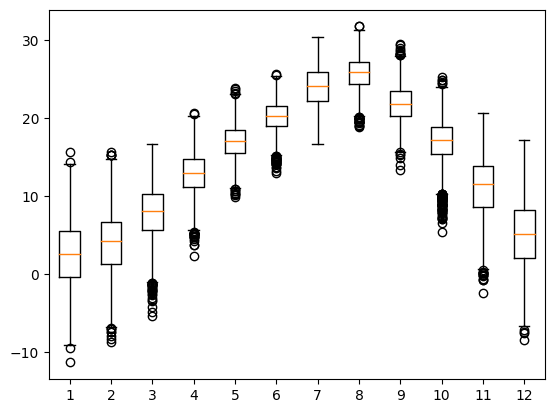

In [77]:
# 월별 데이터 박스로 그리기 

real_df= df[['날짜','평균기온']]
real_df.head()

month_df=[]


for i in range(1,13):
    # print(i)
    month_df.append(real_df.loc[real_df['날짜'].dt.month == i,'평균기온'])


plt.boxplot(month_df)
plt.show()
